<a href="https://colab.research.google.com/github/keshaditi/Uber_Fare_Prediction/blob/main/Uber_Ride_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Learn from Dataset:**

⏱️'trip_duration': Duration of the travel in [seconds]

🛣️ 'distance_traveled': How many kilometers the taxi has covered?

🧑‍🤝‍🧑 'num_of_passengers': How many passengers were in the taxi?

💵 'fare': What is the base fare for the journey?[In INR]

💲 'tip': How much did the driver receive in tips?[In INR]

💰 'total_fare': The amount of money paid for the journey (this is your prediction target!).[In INR]

⚡ 'surge_applied': Was there a surge pricing applied? Yes or no?

**Import Libraries**

In [ ]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,confusion_matrix,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


**Loading Uber DataSet**

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/keshaditi/MLdatasets/refs/heads/main/UberDataset.csv')

In [ ]:
data.head(3)

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748,2.75,1,75.00,24,6.300,105.300,0
1,1187,3.43,1,105.00,24,13.200,142.200,0
2,730,3.12,1,71.25,0,26.625,97.875,1


**Exploratory Data Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trip_duration       1200 non-null   int64  
 1   distance_traveled   1200 non-null   float64
 2   num_of_passengers   1200 non-null   int64  
 3   fare                1200 non-null   float64
 4   tip                 1200 non-null   int64  
 5   miscellaneous_fees  1200 non-null   float64
 6   total_fare          1200 non-null   float64
 7   surge_applied       1200 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 75.1 KB


In [ ]:
data.shape

(1200, 8)

In [ ]:
data.nunique()

,0
trip_duration,845
distance_traveled,521
num_of_passengers,7
fare,97
tip,72
miscellaneous_fees,170
total_fare,401
surge_applied,2


In [ ]:
data.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
trip_duration,0
distance_traveled,0
num_of_passengers,0
fare,0
tip,0
miscellaneous_fees,0
total_fare,0
surge_applied,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(1200, 8)

In [ ]:
data.describe(include='all')

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,1455.280833,4.806983,1.311667,100.122812,12.340833,14.908167,127.371813,0.264167
std,6627.798704,4.795914,0.962793,75.550502,17.367624,12.441725,89.283354,0.441072
min,2.000000,0.020000,0.000000,18.750000,0.000000,0.000000,24.750000,0.000000
25%,456.750000,1.960000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,730.500000,3.180000,1.000000,78.750000,8.000000,9.750000,101.700000,0.000000
75%,1126.000000,5.790000,1.000000,116.250000,20.000000,26.450000,152.456250,1.000000
max,85999.000000,45.460000,6.000000,701.250000,207.000000,124.875000,898.125000,1.000000


In [ ]:
data.dropna(how='any')

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748,2.75,1,75.00,24,6.300,105.300,0
1,1187,3.43,1,105.00,24,13.200,142.200,0
2,730,3.12,1,71.25,0,26.625,97.875,1
3,671,5.63,3,90.00,0,9.750,99.750,0
4,329,2.09,1,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
1195,1048,6.63,1,116.25,0,13.500,129.750,0
1196,569,2.38,1,60.00,9,6.000,75.000,0
1197,1360,6.44,1,108.75,0,6.000,114.750,0
1198,337,2.08,1,45.00,15,6.300,66.300,0


In [ ]:
data = data.drop('num_of_passengers', axis=1)

In [ ]:
data.dtypes

,0
trip_duration,int64
distance_traveled,float64
fare,float64
tip,int64
miscellaneous_fees,float64
total_fare,float64
surge_applied,int64


In [ ]:
data.describe()

,trip_duration,distance_traveled,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,1455.280833,4.806983,100.122812,12.340833,14.908167,127.371813,0.264167
std,6627.798704,4.795914,75.550502,17.367624,12.441725,89.283354,0.441072
min,2.000000,0.020000,18.750000,0.000000,0.000000,24.750000,0.000000
25%,456.750000,1.960000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,730.500000,3.180000,78.750000,8.000000,9.750000,101.700000,0.000000
75%,1126.000000,5.790000,116.250000,20.000000,26.450000,152.456250,1.000000
max,85999.000000,45.460000,701.250000,207.000000,124.875000,898.125000,1.000000


In [ ]:
data.head(3)

,trip_duration,distance_traveled,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748,2.75,75.00,24,6.300,105.300,0
1,1187,3.43,105.00,24,13.200,142.200,0
2,730,3.12,71.25,0,26.625,97.875,1


In [ ]:
data['trip_duration'].describe()

,trip_duration
count,1200.000000
mean,1455.280833
std,6627.798704
min,2.000000
25%,456.750000
50%,730.500000
75%,1126.000000
max,85999.000000


In [ ]:
data.head(2)

,trip_duration,distance_traveled,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748,2.75,75.0,24,6.3,105.3,0
1,1187,3.43,105.0,24,13.2,142.2,0


**Data Visualization**

**Univarient Analysis**

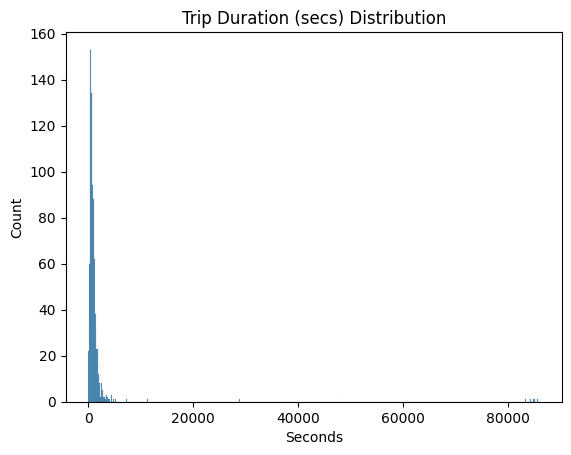

In [ ]:
sns.histplot(data['trip_duration'])
plt.title('Trip Duration (secs) Distribution')
plt.xlabel('Seconds')
plt.ylabel('Count')
plt.show()

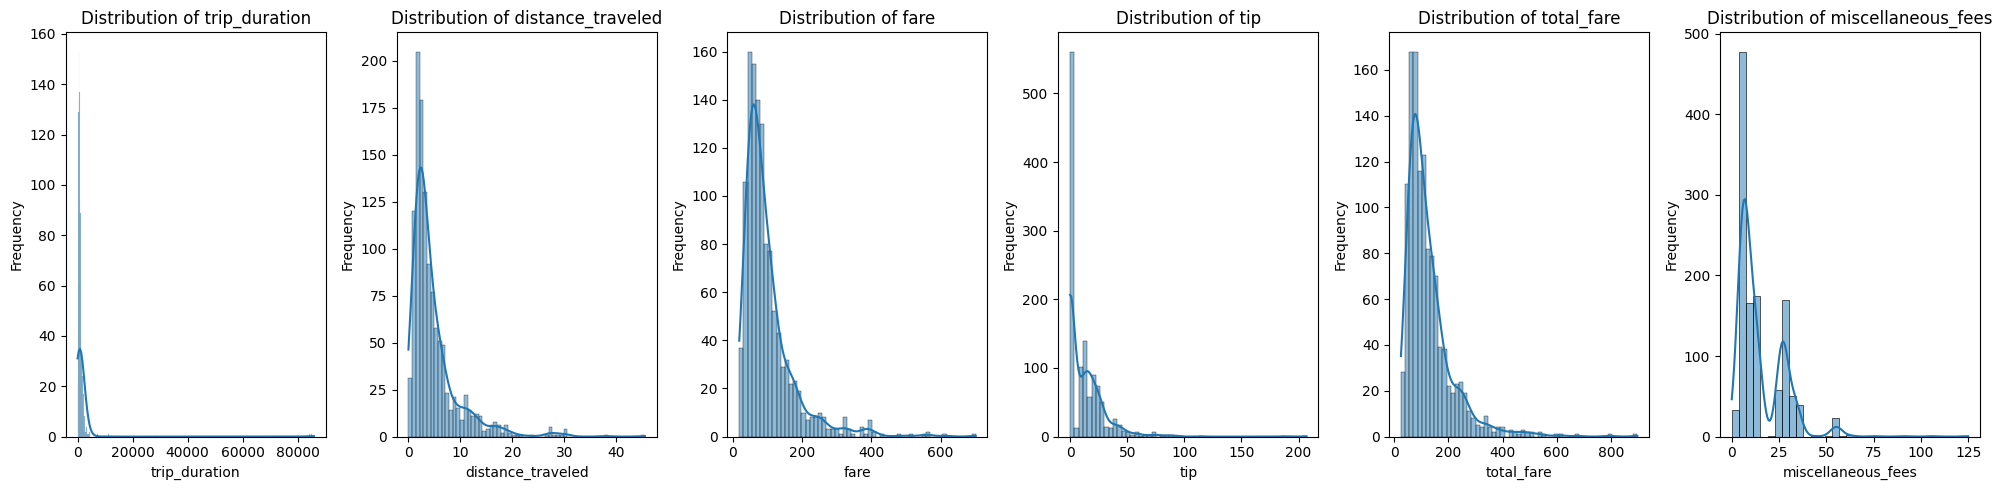

In [ ]:
numerical_features = ['trip_duration', 'distance_traveled', 'fare', 'tip', 'total_fare','miscellaneous_fees']

fig, axes = plt.subplots(1, len(numerical_features), figsize=(20, 5))  # 1 row, n columns

for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], kde=True, ax=axes[i])  # kde=True adds a kernel density estimate curve
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()  # Adjusts subplot params for a tight layout
plt.show()

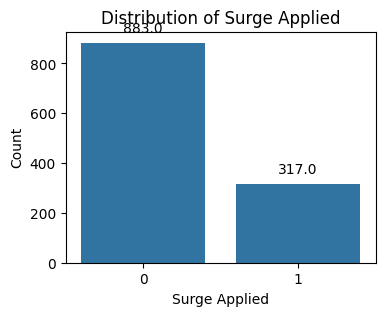

In [ ]:
# Create a bar plot for Surge Applied
plt.figure(figsize=(4, 3))  # Adjust figure size if needed
ax = sns.countplot(x='surge_applied', data=data)
plt.title('Distribution of Surge Applied')
plt.xlabel('Surge Applied')
plt.ylabel('Count')

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

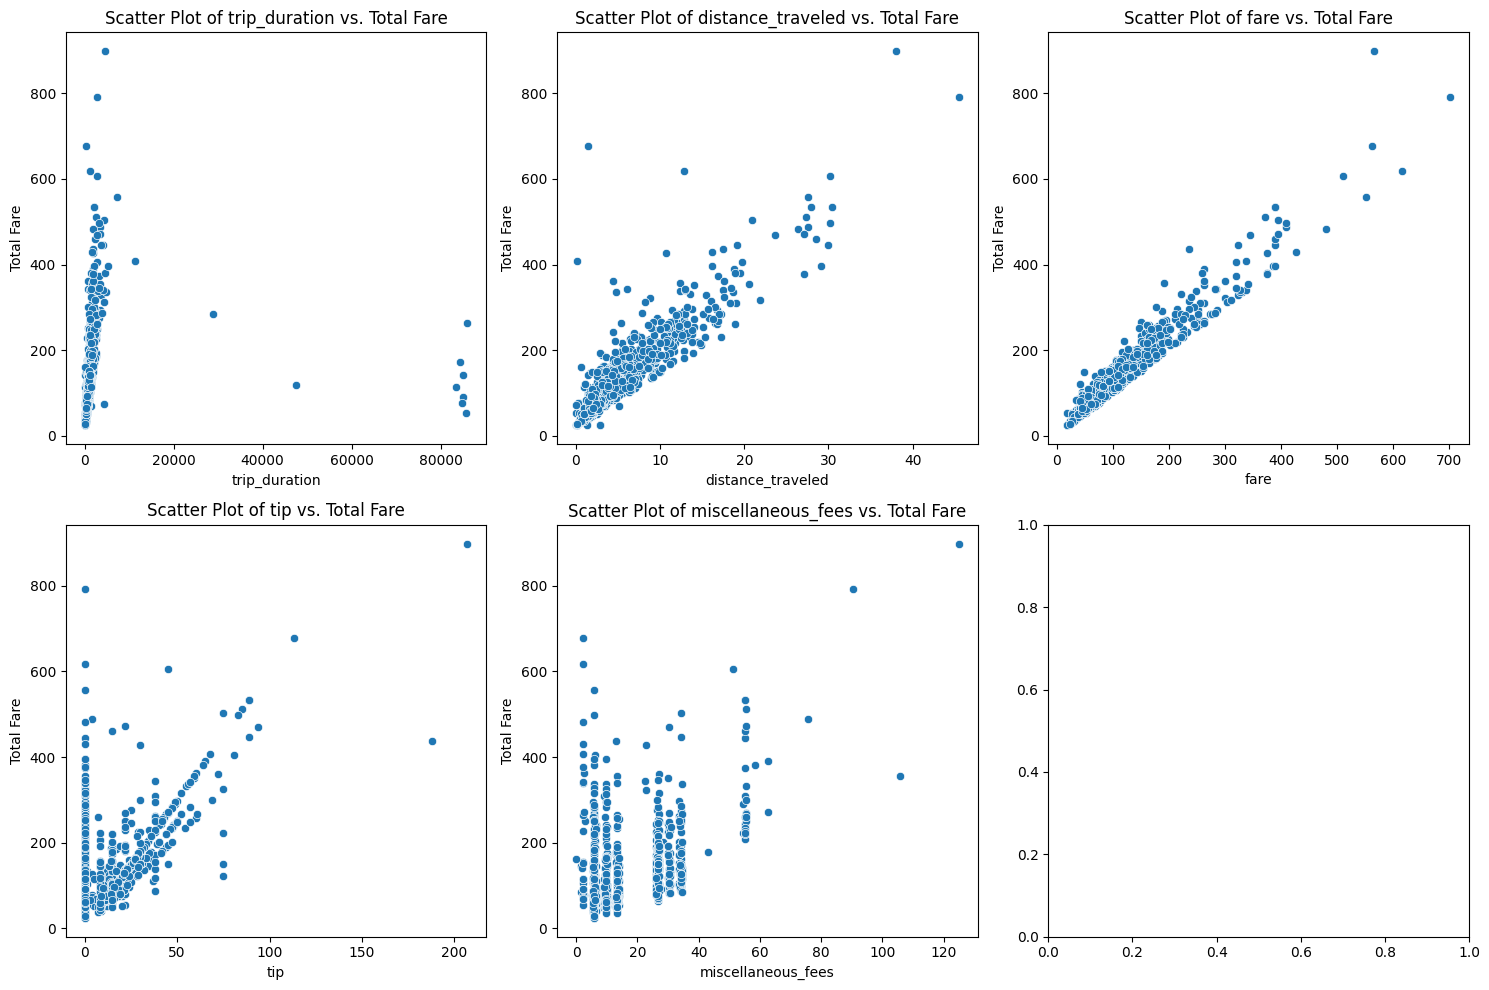

In [ ]:
#Scatter Plot on basis of Total Fare and Features
numerical_features = ['trip_duration', 'distance_traveled', 'fare', 'tip', 'miscellaneous_fees']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()

# Loop through numerical features and create scatter plots
for i, feature in enumerate(numerical_features):
    sns.scatterplot(x=feature, y='total_fare', data=data, ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {feature} vs. Total Fare')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Total Fare')

plt.tight_layout()
plt.show()

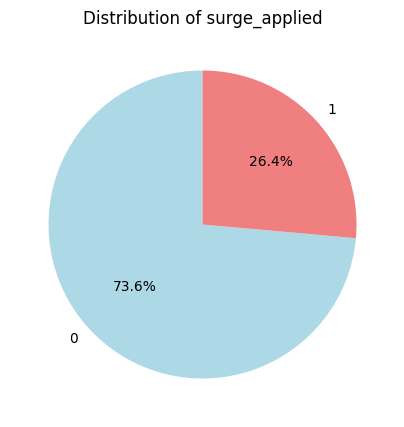

In [ ]:
pie_chart_vars = ['surge_applied']
my_colors = ['lightblue', 'lightcoral', 'lightgreen']
# Create pie charts for each variable
for var in pie_chart_vars:
    # Calculate counts
    counts = data[var].value_counts()

    # Create pie chart
    plt.figure(figsize=(5, 5))  # Adjust figure size if needed
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90,colors=my_colors)
    plt.title(f'Distribution of {var}')
    plt.show()

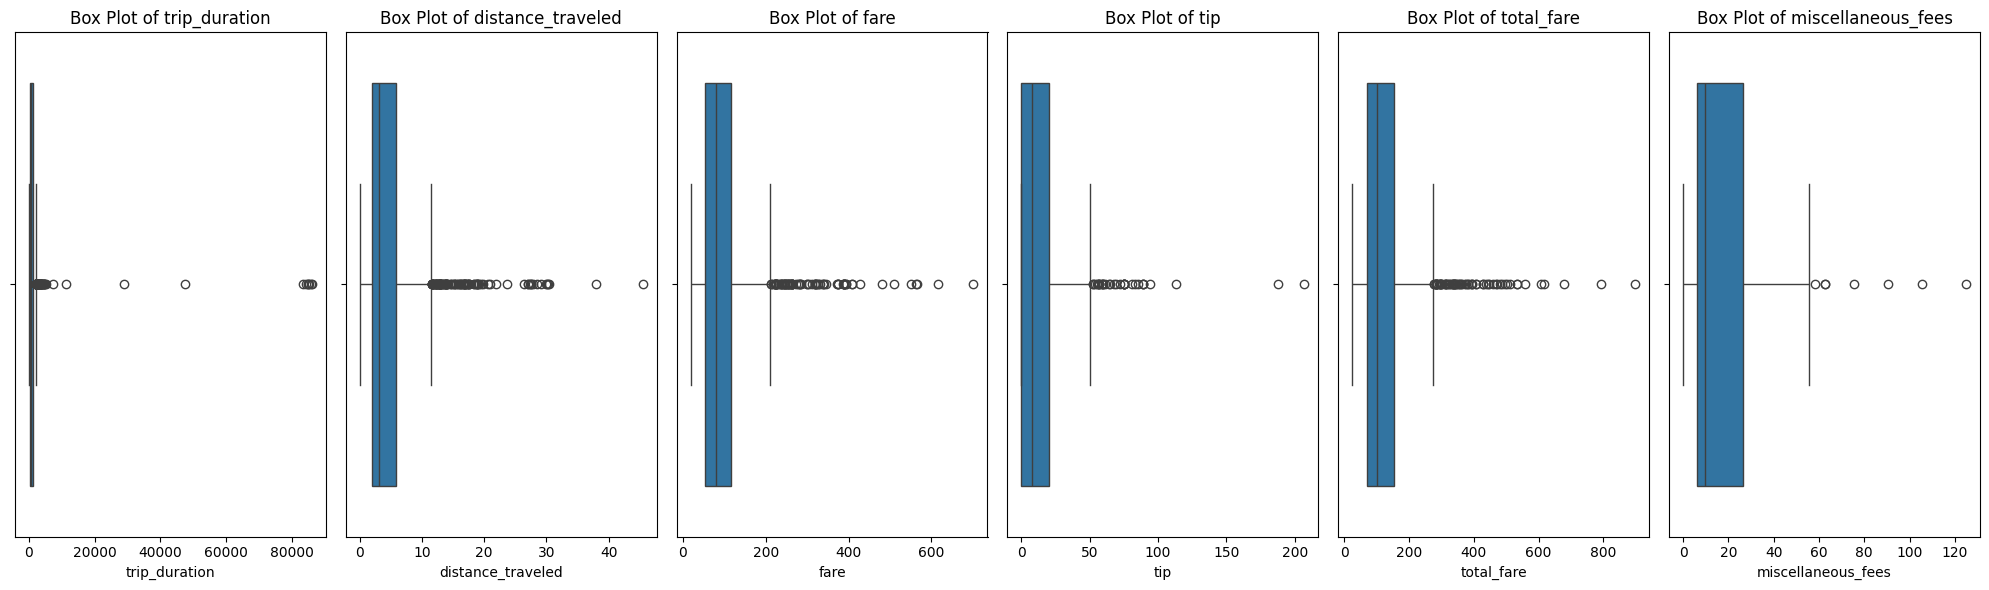

In [ ]:
#Box plot to find outliers
numerical_features = ['trip_duration', 'distance_traveled', 'fare', 'tip', 'total_fare', 'miscellaneous_fees']

# Create subplots in a single row
fig, axes = plt.subplots(1, len(numerical_features), figsize=(20, 6))  # 1 row, n columns

# Loop through features and create box plots on subplots
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=data[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel(feature)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [ ]:
#Removing outliers
numerical_features = ['trip_duration', 'distance_traveled',  'fare', 'tip', 'total_fare','miscellaneous_fees']

for feature in numerical_features:
    z = np.abs(stats.zscore(data[feature]))

    # Filter data for the current feature
    data = data[(z < 3)]  # Threshold of 3 for outliers

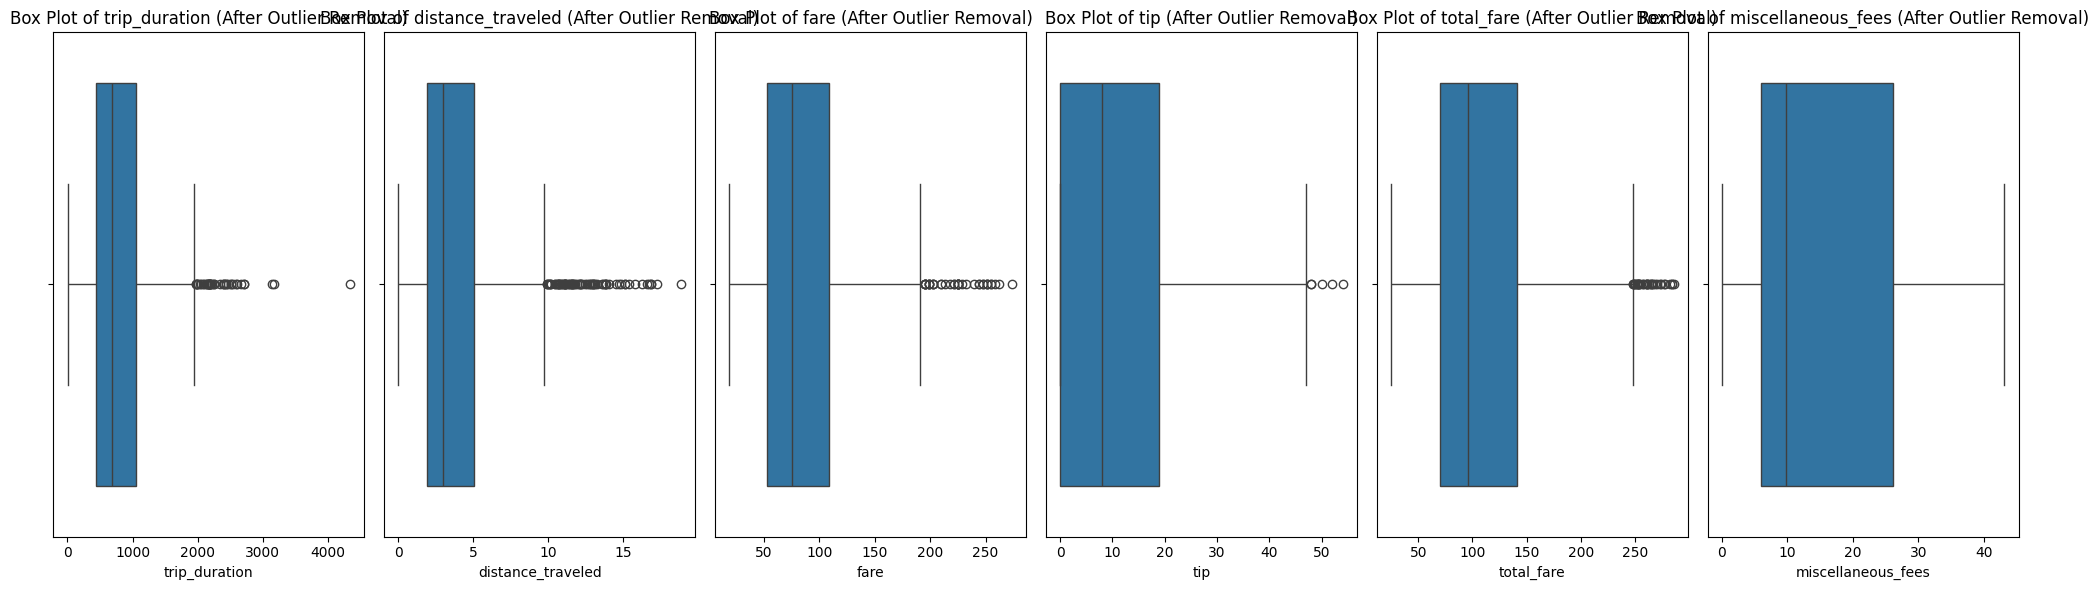

In [ ]:
#After Outlier dataset
numerical_features = ['trip_duration', 'distance_traveled',  'fare', 'tip', 'total_fare','miscellaneous_fees']
fig, axes = plt.subplots(1, len(numerical_features), figsize=(20, 6))  # 1 row, n columns
# Loop through features and create box plots on subplots
for i, feature in enumerate(numerical_features):
  sns.boxplot(x=data[feature], ax=axes[i])
  axes[i].set_title(f'Box Plot of {feature} (After Outlier Removal)')
  axes[i].set_xlabel(feature)
plt.tight_layout()
plt.show()

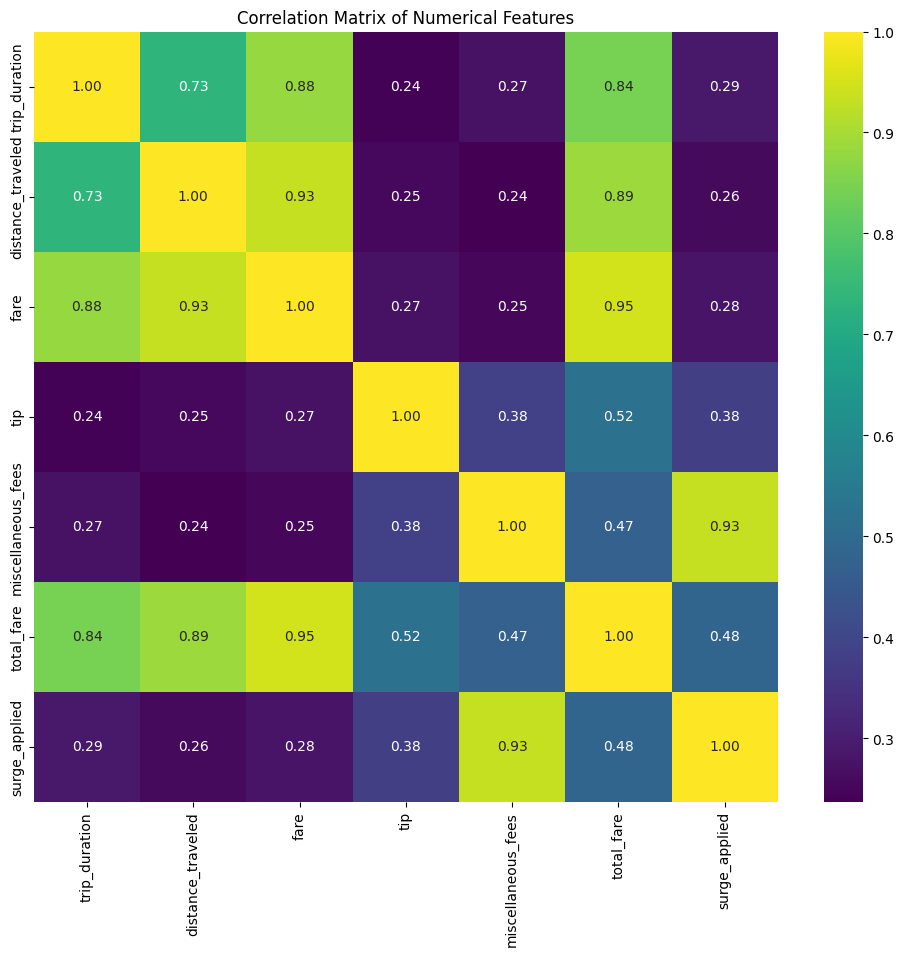

In [ ]:
#Correlation Matrix
correlation_matrix = data.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


**Model Training & Testing **

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
X=data.drop(['total_fare'],axis=1)
y=data['total_fare']

In [ ]:
X.head(3)

,trip_duration,distance_traveled,fare,tip,miscellaneous_fees,surge_applied
0,748,2.75,75.00,24,6.300,0
1,1187,3.43,105.00,24,13.200,0
2,730,3.12,71.25,0,26.625,1


In [ ]:
y

,total_fare
0,105.300
1,142.200
2,97.875
3,99.750
4,70.200
...,...
1195,129.750
1196,75.000
1197,114.750
1198,66.300


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

**Model Selection**

In [ ]:
# Linear Regression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Random Forest
RF = RandomForestRegressor(random_state=30)
RF.fit(X_train, y_train)

RandomForestRegressor(random_state=30)

In [ ]:
# XGBoost
XGB = xgb.XGBRegressor(random_state=30)
XGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=30, ...)

In [ ]:
#Make prediction and evaluate
models = [LR, RF, XGB]
model_names = ['Linear Regression', 'Random Forest', 'XGBoost']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Model: {name}")
    print(f"R-squared: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print("-" * 20)

Model: Linear Regression
R-squared: 1.0000
Mean Squared Error: 0.0000
Mean Absolute Error: 0.0000
--------------------
Model: Random Forest
R-squared: 0.9948
Mean Squared Error: 13.6570
Mean Absolute Error: 2.3118
--------------------
Model: XGBoost
R-squared: 0.9943
Mean Squared Error: 14.9379
Mean Absolute Error: 2.2725
--------------------


In [ ]:
# Make predictions
y_pred_LR = LR.predict(X_test)
y_pred_RF = RF.predict(X_test)
y_pred_XGB = XGB.predict(X_test)

# Calculate R2 scores
r2_LR = r2_score(y_test, y_pred_LR)
r2_RF = r2_score(y_test, y_pred_RF)
r2_XGB = r2_score(y_test, y_pred_XGB)

# Find the best model
best_model = max([(r2_LR, 'Linear Regression'), (r2_RF, 'Random Forest'), (r2_XGB, 'XGBoost')])[1]

print(f"The best model based on R2 score is: {best_model}")

The best model based on R2 score is: Linear Regression


In [ ]:
scaler = StandardScaler()
X_train_SD = scaler.fit_transform(X_train)

**Model Building**

In [ ]:
LR = LinearRegression()
LR.fit(X_train_SD, y_train)

LinearRegression()

In [ ]:
print("Mean Square Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Mean Square Error: 14.937874301523525
Mean Absolute Error: 2.2725010043846634


In [ ]:
accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9943045613881192


In [ ]:
LR.score(X_train_SD,y_train)

1.0

In [ ]:
LR.score(X_test,y_test)

-8410.103303498665

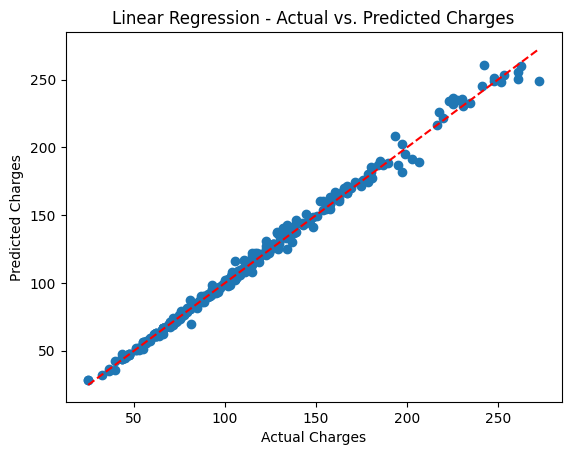

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression - Actual vs. Predicted Charges')
plt.show()

In [ ]:
# Coefficient and Intercept
print("Intercept:",LR.intercept_)
print("\n")
print("Coefficient(s):", LR.coef_)

Intercept: 110.84556555269926


Coefficient(s): [-1.07792301e-14  4.97379915e-14  4.66630454e+01  1.25516411e+01
  9.61345652e+00  0.00000000e+00]


**Confusion Matrix**

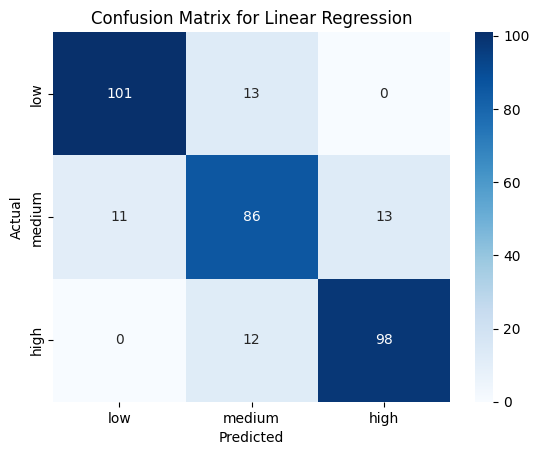

In [ ]:
y_pred = LR.predict(X_test)
data['fare_category'] = pd.qcut(data['total_fare'], 3, labels=['low', 'medium', 'high'])
y_pred_cat = pd.qcut(y_pred, 3, labels=['low', 'medium', 'high'])

# Discretize y_test to create y_test_cat (New line)
y_test_cat = pd.qcut(y_test, 3, labels=['low', 'medium', 'high'])

# 5. Create the confusion matrix
cm = confusion_matrix(y_test_cat, y_pred_cat, labels=['low', 'medium', 'high'])

# 6. Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['low', 'medium', 'high'],
            yticklabels=['low', 'medium', 'high'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Linear Regression')
plt.show()

**PREDICTION**

In [ ]:
LR.predict([[20, 2.7, 5,4,3,1]])

array([423.20772616])

In [ ]:
LR.predict([[120, 5.7,15,2,30,1]])

array([1124.29822356])